In [2]:
import pickle

In [3]:
with open('/home/team/바탕화면/파이널프로젝트/data/final_777', 'rb') as f:
    data = pickle.load(f) # 단 한줄씩 읽어옴

In [8]:
data

{'KgQnRvsPSrJJTOCp-reYZA': {'PN': 0,
  'spicy': 1,
  'sweet': 0,
  'sour': 0,
  'saulty': 1,
  'mild': 0,
  'normal': 0,
  'for_vegitarian': 1,
  'for_mania': 1,
  'for_starter': 1},
 '1goJa-4OKwc--vlISRm54g': {'PN': 0,
  'spicy': 1,
  'sweet': 0,
  'sour': 0,
  'saulty': 1,
  'mild': 0,
  'normal': 0,
  'for_vegitarian': 1,
  'for_mania': 1,
  'for_starter': 1},
 '6agrhhelmT9DLUfx4EeZVA': {'PN': 0,
  'spicy': 1,
  'sweet': 0,
  'sour': 0,
  'saulty': 1,
  'mild': 0,
  'normal': 0,
  'for_vegitarian': 1,
  'for_mania': 1,
  'for_starter': 1},
 'AvaeN3hgxdytAEMlNud-FQ': {'PN': 0,
  'spicy': 1,
  'sweet': 0,
  'sour': 0,
  'saulty': 1,
  'mild': 0,
  'normal': 0,
  'for_vegitarian': 1,
  'for_mania': 1,
  'for_starter': 1},
 'wML8YiFzB1JuCfyhPptiSg': {'PN': 0,
  'spicy': 1,
  'sweet': 0,
  'sour': 0,
  'saulty': 1,
  'mild': 0,
  'normal': 0,
  'for_vegitarian': 1,
  'for_mania': 1,
  'for_starter': 1},
 '2bngtPXH3fcpHX0c7DwBew': {'PN': 0,
  'spicy': 1,
  'sweet': 0,
  'sour': 0,
  'saul

In [159]:
import pandas as pd # raw dataset
from surprise import SVD, accuracy # SVD model, 평가
from surprise import Reader, Dataset # SVD model의 dataset 

In [160]:
df = pd.read_csv('/home/team/바탕화면/파이널프로젝트/data/jinjaru.csv')
df = df.drop('Unnamed: 0', axis=1)

In [161]:
df['menu'] = df['menu'].apply( eval )

In [156]:
df.head()

,user_name,res_name,rating,review,menu,PN,spicy,sweet,sour,saulty,mild,normal,for_vegitarian,for_mania,for_starter
menu,,,,,,,,,,,,,,,
"[bulgogi, galbigui, kimchijjigae, doenjangjjigae, galbitang]",KgQnRvsPSrJJTOCp-reYZA,Seoul Garden Korean Restaurant,5,we have been here three times now and have lov...,"[bulgogi, galbigui, kimchijjigae, doenjangjjig...",0,1,0,0,1,0,0,1,1,1
"[bulgogi, galbigui, kimchijjigae, doenjangjjigae, galbitang]",1goJa-4OKwc--vlISRm54g,Seoul Garden Korean Restaurant,5,seoul garden was excellent. we moved to this ...,"[bulgogi, galbigui, kimchijjigae, doenjangjjig...",1,0,0,0,0,0,0,0,1,1
"[bulgogi, galbigui, kimchijjigae, doenjangjjigae, galbitang]",6agrhhelmT9DLUfx4EeZVA,Seoul Garden Korean Restaurant,4,i like this place a lot. one of the best korea...,"[bulgogi, galbigui, kimchijjigae, doenjangjjig...",1,0,0,0,0,0,1,0,0,0
"[bulgogi, galbigui, kimchijjigae, doenjangjjigae, galbitang]",AvaeN3hgxdytAEMlNud-FQ,Seoul Garden Korean Restaurant,5,korean barbecue at its finest. the outside doe...,"[bulgogi, galbigui, kimchijjigae, doenjangjjig...",1,0,0,0,0,0,0,0,1,1
"[bulgogi, galbigui, kimchijjigae, doenjangjjigae, galbitang]",wML8YiFzB1JuCfyhPptiSg,Seoul Garden Korean Restaurant,2,food was ok. the food looks good in pictures b...,"[bulgogi, galbigui, kimchijjigae, doenjangjjig...",0,1,0,0,0,1,0,0,0,0


In [165]:
df['review'][0].split('.')

['we have been here three times now and have loved it each time',
 " it doesn't look like much outside but do not let that stop you from going in",
 ' parking can be scarce!\r\n\r\nthe dumplings are amazing, we love them so much we have ordered a second round',
 ' they are crispy and the dipping sauce pushes the flavor over the top',
 ' \r\n\r\nthere is a great variety of banchan',
 ' honestly, sometimes i have no clue what i am eating exactly but it tastes so good i do not even care',
 ' the kimchi is fresh and well flavored',
 '  the fish banchan is one of our favorites as well as the potato',
 ' \r\n\r\nwe have tried the bbq beef, the beef ribs and the pork belly',
 ' we wanted to try the octopus soup tonight but the server said that it was very spicy and my husband can not even handle the kimchi so we opted not',
 ' \r\n\r\ni love soy bean paste to dip in',
 '',
 '',
 'you have to ask for it',
 '',
 '',
 'try it out',
 ' it is salty and complex',
 '']

- ? user_name 에 한글이 있다 ?

In [58]:
'혁 권' in list(df['user_name'].unique())

True

In [12]:
df.columns

Index(['user_name', 'res_name', 'rating', 'review', 'menu', 'PN', 'spicy',
       'sweet', 'sour', 'saulty', 'mild', 'normal', 'for_vegitarian',
       'for_mania', 'for_starter'],
      dtype='object')

In [ ]:
import re 

In [68]:
only_eng_user = []

for i in df['user_name'] :

    korean = re.compile('[\u3131-\u3163\uac00-\ud7a3]+')
    parseText= re.sub(korean, '', i)
    only_eng_user.append(parseText)

In [166]:
only_eng_user

['KgQnRvsPSrJJTOCp-reYZA',
 '1goJa-4OKwc--vlISRm54g',
 '6agrhhelmT9DLUfx4EeZVA',
 'AvaeN3hgxdytAEMlNud-FQ',
 'wML8YiFzB1JuCfyhPptiSg',
 '2bngtPXH3fcpHX0c7DwBew',
 'Z27fERSsub99cZNbcJHBDg',
 'E9DoTIRkPcEKPdvpkV0Fxg',
 'jriMjvunDamzH2TaWdzBTw',
 'fKt8bk-XnHqv9Gu1_9IvGw',
 'l4pabLd84WrBxt-nHVsZ3g',
 'fg1v6qNggdFgJTRXiPOd1Q',
 'SE43nlinpUKfo1TVl06A-g',
 'lVbPEaNUxFjwUydjentrYw',
 'hp0ezrR5yloXq8jTi6lqhg',
 'SVmqctHxKImEBCGS_NHu6g',
 'oF_vwmhGi-JechfnimM60Q',
 'PO-IzWhMcWIs0dw3qwT1kQ',
 'H53JegswuWA8j6Mrgi9rQQ',
 'uwKShzHVPvKTehL5-1HxIg',
 'GG3xJyVFN9wjkK3F9nXTDA',
 '5H4u9OfcumSc4qF3Zli1uQ',
 'gI0OF26kyv_bCRLTqbgPkw',
 'Ox0WsOVz57WL0RngHdBLmQ',
 'zxKHsb4cR4y4aRyNhyw_NA',
 '3j3BQeIcCctHxq-zp5yBUQ',
 'H409BZkbCg14CLw0658RcA',
 'xyiQoewUbhToXp1fo7uHuA',
 'GUMYpqJDPzfjBl5l4D3WxA',
 '0Op1u08YZ5vbBe7Aq4QntA',
 'xtSUDdVMtrlql2DPENfbtw',
 'U0f_4akbwF5zlsUpS1Mnfg',
 'NJqmAzerpbAIC0-VBclwgA',
 'DleIZnWMrZ8rvryzpyFovA',
 '7oTvL2aILh3oCVS-nIPnPQ',
 'Z7ecdXpbpVGaq1yncOsU5w',
 '7aiy7jBbCBoAAJAH2zGZHg',
 

In [69]:
len(only_eng_user)

110913

In [76]:
type(df.spicy)

pandas.core.series.Series

### 멀티 인덱스, 멀티 레벨로 교차표 만들기 

In [151]:
df[['user_name','menu','spicy']]
part = df[['user_name','menu']]

In [153]:
part.set_index(part['menu'], inplace=True)
part

,user_name,menu
menu,,
"[bulgogi, galbigui, kimchijjigae, doenjangjjigae, galbitang]",KgQnRvsPSrJJTOCp-reYZA,"[bulgogi, galbigui, kimchijjigae, doenjangjjig..."
"[bulgogi, galbigui, kimchijjigae, doenjangjjigae, galbitang]",1goJa-4OKwc--vlISRm54g,"[bulgogi, galbigui, kimchijjigae, doenjangjjig..."
"[bulgogi, galbigui, kimchijjigae, doenjangjjigae, galbitang]",6agrhhelmT9DLUfx4EeZVA,"[bulgogi, galbigui, kimchijjigae, doenjangjjig..."
"[bulgogi, galbigui, kimchijjigae, doenjangjjigae, galbitang]",AvaeN3hgxdytAEMlNud-FQ,"[bulgogi, galbigui, kimchijjigae, doenjangjjig..."
"[bulgogi, galbigui, kimchijjigae, doenjangjjigae, galbitang]",wML8YiFzB1JuCfyhPptiSg,"[bulgogi, galbigui, kimchijjigae, doenjangjjig..."
...,...,...
"[friedchicken, yangnyeomchicken]",MrsOS2014,"[friedchicken, yangnyeomchicken]"
"[friedchicken, yangnyeomchicken]",Alison A,"[friedchicken, yangnyeomchicken]"
"[friedchicken, yangnyeomchicken]",addiction4travel,"[friedchicken, yangnyeomchicken]"


In [147]:
part.T

,0,1,2,3,4,5,6,7,8,9,...,110903,110904,110905,110906,110907,110908,110909,110910,110911,110912
user_name,KgQnRvsPSrJJTOCp-reYZA,1goJa-4OKwc--vlISRm54g,6agrhhelmT9DLUfx4EeZVA,AvaeN3hgxdytAEMlNud-FQ,wML8YiFzB1JuCfyhPptiSg,2bngtPXH3fcpHX0c7DwBew,Z27fERSsub99cZNbcJHBDg,E9DoTIRkPcEKPdvpkV0Fxg,jriMjvunDamzH2TaWdzBTw,fKt8bk-XnHqv9Gu1_9IvGw,...,Alexandra L,Kathy K,kylavjade_,Maya1306,Arlene K,MrsOS2014,Alison A,addiction4travel,152JoyB,LC888
menu,"[bulgogi, galbigui, kimchijjigae, doenjangjjig...","[bulgogi, galbigui, kimchijjigae, doenjangjjig...","[bulgogi, galbigui, kimchijjigae, doenjangjjig...","[bulgogi, galbigui, kimchijjigae, doenjangjjig...","[bulgogi, galbigui, kimchijjigae, doenjangjjig...","[bulgogi, galbigui, kimchijjigae, doenjangjjig...","[bulgogi, galbigui, kimchijjigae, doenjangjjig...","[bulgogi, galbigui, kimchijjigae, doenjangjjig...","[bulgogi, galbigui, kimchijjigae, doenjangjjig...","[bulgogi, galbigui, kimchijjigae, doenjangjjig...",...,"[friedchicken, yangnyeomchicken]","[friedchicken, yangnyeomchicken]","[friedchicken, yangnyeomchicken]","[friedchicken, yangnyeomchicken]","[friedchicken, yangnyeomchicken]","[friedchicken, yangnyeomchicken]","[friedchicken, yangnyeomchicken]","[friedchicken, yangnyeomchicken]","[friedchicken, yangnyeomchicken]","[friedchicken, yangnyeomchicken]"


In [ ]:



df['user_name']
df['menu']

In [155]:
food_eng = food_in_english
food_eng

['galbigui',
 'galchigui',
 'godeungeogui',
 'gopchanggui',
 'dakgalbi',
 'deodeokgui',
 'tteokgalbi',
 'bulgogi',
 'samgyeopsal',
 'jangeogui',
 'jogaegui',
 'jogigui',
 'hwangtaegui',
 'hunjeori',
 'gyelangug',
 'tteokguk-mandutguk',
 'muguk',
 'miyeokguk',
 'bugeotguk',
 'siraegiguk',
 'yukgaejang',
 'kongnamulguk',
 'gwamegi',
 'yangnyeomchicken',
 'jeotgal',
 'kongjaban',
 'pyeonyuk',
 'pizza',
 'friedchicken',
 'gatkimchi',
 'kkakdugi',
 'nabakkimchi',
 'musaengchae',
 'baechukimchi',
 'baekkimchi',
 'buchukimchi',
 'yeolmukimchi',
 'oisobagi',
 'chonggakkimchi',
 'pakimchi',
 'gajibokkeum',
 'gosarinamul',
 'miyeokjulgibokkeum',
 'sukjunamul',
 'sigeumchinamul',
 'aehobakbokkeum',
 'gyeongdan',
 'kkultteok',
 'songpyeon',
 'mandu',
 'ramyeon',
 'makguksu',
 'mulnaengmyeon',
 'bibimnaengmyeon',
 'sujebi',
 'yeolmuguksu',
 'janchiguksu',
 'jajangmyeon',
 'jjamppong',
 'jjolmyeon',
 'kalguksu',
 'kongguksu',
 'kkwaligochumuchim',
 'dorajimuchim',
 'dotorimuk',
 'japchae',
 'kongnam

In [ ]:
for i in food_eng :
    for idx,value in enumerate(df['menu']) :
        for j,k in enumerate(value) :
            if i == k :
                value = 

In [110]:
df.iloc[[0,1]]

,user_name,res_name,rating,review,menu,PN,spicy,sweet,sour,saulty,mild,normal,for_vegitarian,for_mania,for_starter
0,KgQnRvsPSrJJTOCp-reYZA,Seoul Garden Korean Restaurant,5,we have been here three times now and have lov...,"['bulgogi', 'galbigui', 'kimchijjigae', 'doenj...",0,1,0,0,1,0,0,1,1,1
1,1goJa-4OKwc--vlISRm54g,Seoul Garden Korean Restaurant,5,seoul garden was excellent. we moved to this ...,"['bulgogi', 'galbigui', 'kimchijjigae', 'doenj...",1,0,0,0,0,0,0,0,1,1


In [111]:
taste = ['PN','spicy','sweet','sour','saulty','mild','normal',
'for_vegitarian','for_mania','for_starter']

In [109]:
tab = pd.crosstab(df['user_name'],df['menu'])
tab

menu,"['""saeubokkeumbap""']",[''],['Bibimbap'],['Chois Korean Restaurant'],['Dwaejigukbap'],['Gangnam'],['Korean BBQ'],['None'],['Star�겓BBQ'],"['baechukimchi', 'baekkimchi', 'kkakdugi', 'tteokguk-mandutguk', 'bulgogi']",...,['yangnyeomchicken'],"['yubuchobap', 'yukhoe', 'bibimbap', 'tteokgalbi']","['yukgaejang', 'bulgogi', 'galbigui']","['yukgaejang', 'gamjatang', 'galbitang', 'samgyetang', 'doenjangjjigae', 'kimchijjigae', 'maeuntang']","['yukgaejang', 'mandu', 'ramyeon', 'baechukimchi', 'bibimbap', 'jjamppong']",['yukgaejang'],"['yukhoe', 'bibimbap']","['yukhoe', 'bossam', 'jokbal']","['yukhoe', 'jogigui', 'gajibokkeum']","['yukhoe', 'suyuk', 'doenjangjjigae', 'dongeurangttaeng', 'kimchijeon', 'bulgogi']"
user_name,,,,,,,,,,,,,,,,,,,,,
",Paul K",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
---1lKK3aKOuomHnwAkAow,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--7q4qPwEmsNj11x_oKJbw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--DxiDMQgN08E5gTM0aj7Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
--FQhZ5lnIL-6YG8OEEmiw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
혁 권,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
형빈 임,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
혜원 강,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df[['user_name','menu','PN', 'spicy',
       'sweet', 'sour', 'saulty', 'mild', 'normal', 'for_vegitarian',
       'for_mania', 'for_starter']]

,user_name,menu,PN,spicy,sweet,sour,saulty,mild,normal,for_vegitarian,for_mania,for_starter
0,KgQnRvsPSrJJTOCp-reYZA,"['bulgogi', 'galbigui', 'kimchijjigae', 'doenj...",0,1,0,0,1,0,0,1,1,1
1,1goJa-4OKwc--vlISRm54g,"['bulgogi', 'galbigui', 'kimchijjigae', 'doenj...",1,0,0,0,0,0,0,0,1,1
2,6agrhhelmT9DLUfx4EeZVA,"['bulgogi', 'galbigui', 'kimchijjigae', 'doenj...",1,0,0,0,0,0,1,0,0,0
3,AvaeN3hgxdytAEMlNud-FQ,"['bulgogi', 'galbigui', 'kimchijjigae', 'doenj...",1,0,0,0,0,0,0,0,1,1
4,wML8YiFzB1JuCfyhPptiSg,"['bulgogi', 'galbigui', 'kimchijjigae', 'doenj...",0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110908,MrsOS2014,"['friedchicken', 'yangnyeomchicken']",0,1,0,0,1,0,0,1,0,0
110909,Alison A,"['friedchicken', 'yangnyeomchicken']",1,1,1,0,0,0,0,0,1,0
110910,addiction4travel,"['friedchicken', 'yangnyeomchicken']",0,0,0,0,0,0,0,0,1,0
110911,152JoyB,"['friedchicken', 'yangnyeomchicken']",1,0,0,0,0,0,0,0,1,1


- 각 변수간의 상관관계 보기 

In [94]:
df.corr()

,rating,PN,spicy,sweet,sour,saulty,mild,normal,for_vegitarian,for_mania,for_starter
rating,1.000000,0.240004,0.019517,-0.047196,-0.008974,-0.035596,-0.007287,-0.071079,-0.002497,0.096960,0.064160
PN,0.240004,1.000000,-0.025246,-0.082033,-0.049673,-0.106890,-0.071757,-0.089328,-0.029319,0.143201,0.102520
spicy,0.019517,-0.025246,1.000000,0.190871,0.136089,0.112229,0.114327,-0.221951,0.127224,0.099442,0.177281
sweet,-0.047196,-0.082033,0.190871,1.000000,0.107603,0.135655,0.058602,-0.115385,0.081675,0.077816,0.094469
sour,-0.008974,-0.049673,0.136089,0.107603,1.000000,0.045564,0.131022,-0.120859,0.168646,0.084798,0.103692
saulty,-0.035596,-0.106890,0.112229,0.135655,0.045564,1.000000,0.058873,-0.077417,0.078217,0.033941,0.060630
mild,-0.007287,-0.071757,0.114327,0.058602,0.131022,0.058873,1.000000,-0.105469,0.112582,0.049603,0.071710
normal,-0.071079,-0.089328,-0.221951,-0.115385,-0.120859,-0.077417,-0.105469,1.000000,-0.166629,-0.693727,-0.442053
for_vegitarian,-0.002497,-0.029319,0.127224,0.081675,0.168646,0.078217,0.112582,-0.166629,1.000000,0.084331,0.064915
for_mania,0.096960,0.143201,0.099442,0.077816,0.084798,0.033941,0.049603,-0.693727,0.084331,1.000000,0.364063


In [100]:
# %matplotlib inline   #쥬피터노트북에서 이미지 표시가능하게 하는 쥬피터노트북 매직함수
import matplotlib.pyplot as plt 
import seaborn as sns    

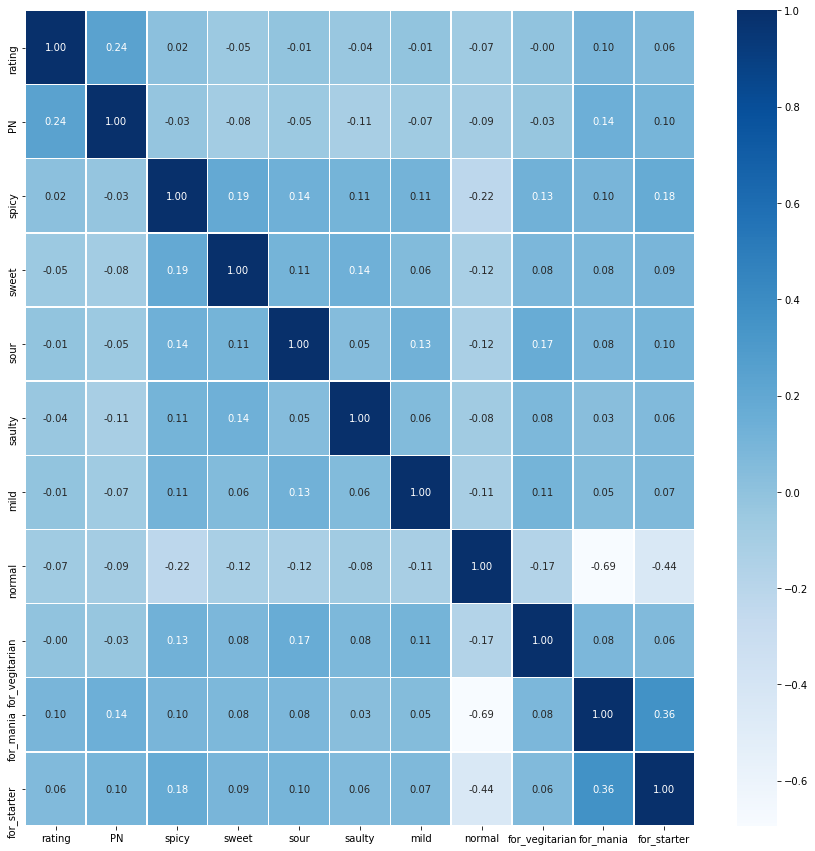

In [101]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
# 리뷰에서 각 맛표현 빈도 세어봐야할듯 

In [105]:
ps = df.corr(method='pearson')
print(ps)

                  rating        PN     spicy     sweet      sour    saulty  \
rating          1.000000  0.240004  0.019517 -0.047196 -0.008974 -0.035596   
PN              0.240004  1.000000 -0.025246 -0.082033 -0.049673 -0.106890   
spicy           0.019517 -0.025246  1.000000  0.190871  0.136089  0.112229   
sweet          -0.047196 -0.082033  0.190871  1.000000  0.107603  0.135655   
sour           -0.008974 -0.049673  0.136089  0.107603  1.000000  0.045564   
saulty         -0.035596 -0.106890  0.112229  0.135655  0.045564  1.000000   
mild           -0.007287 -0.071757  0.114327  0.058602  0.131022  0.058873   
normal         -0.071079 -0.089328 -0.221951 -0.115385 -0.120859 -0.077417   
for_vegitarian -0.002497 -0.029319  0.127224  0.081675  0.168646  0.078217   
for_mania       0.096960  0.143201  0.099442  0.077816  0.084798  0.033941   
for_starter     0.064160  0.102520  0.177281  0.094469  0.103692  0.060630   

                    mild    normal  for_vegitarian  for_mania  

In [93]:
pd.crosstab(df['user_name'],df['spicy'])

spicy,0,1
user_name,,
",Paul K",2,1
---1lKK3aKOuomHnwAkAow,1,0
--7q4qPwEmsNj11x_oKJbw,1,0
--DxiDMQgN08E5gTM0aj7Q,2,0
--FQhZ5lnIL-6YG8OEEmiw,1,0
...,...,...
혁 권,1,0
형빈 임,1,0
혜원 강,0,1


In [86]:
pd.crosstab([df.spicy,df.sweet], df.user_name).T

spicy                   0     1   
sweet                   0  1  0  1
user_name                         
,Paul K                 2  0  1  0
---1lKK3aKOuomHnwAkAow  1  0  0  0
--7q4qPwEmsNj11x_oKJbw  1  0  0  0
--DxiDMQgN08E5gTM0aj7Q  2  0  0  0
--FQhZ5lnIL-6YG8OEEmiw  1  0  0  0
...                    .. .. .. ..
혁 권                     1  0  0  0
형빈 임                    1  0  0  0
혜원 강                    0  0  1  0
호경 김                    0  0  1  0
효섭 김                    1  0  0  0

[78633 rows x 4 columns]

In [83]:
pd.crosstab(df['user_name'], df['spicy'])

spicy,0,1
user_name,,
",Paul K",2,1
---1lKK3aKOuomHnwAkAow,1,0
--7q4qPwEmsNj11x_oKJbw,1,0
--DxiDMQgN08E5gTM0aj7Q,2,0
--FQhZ5lnIL-6YG8OEEmiw,1,0
...,...,...
혁 권,1,0
형빈 임,1,0
혜원 강,0,1


In [79]:
pd.crosstab(df.user_name,[df.spicy, df.sweet])

spicy                   0     1   
sweet                   0  1  0  1
user_name                         
,Paul K                 2  0  1  0
---1lKK3aKOuomHnwAkAow  1  0  0  0
--7q4qPwEmsNj11x_oKJbw  1  0  0  0
--DxiDMQgN08E5gTM0aj7Q  2  0  0  0
--FQhZ5lnIL-6YG8OEEmiw  1  0  0  0
...                    .. .. .. ..
혁 권                     1  0  0  0
형빈 임                    1  0  0  0
혜원 강                    0  0  1  0
호경 김                    0  0  1  0
효섭 김                    1  0  0  0

[78633 rows x 4 columns]

- 구성비율로 교차표 만들기 

In [82]:
df_out = df['0']['1'] 

KeyError: '0'

In [80]:
pd.crosstab(df.user_name,[df.spicy, df.sweet], normalize=True)

spicy                          0              1     
sweet                          0    1         0    1
user_name                                           
,Paul K                 0.000018  0.0  0.000009  0.0
---1lKK3aKOuomHnwAkAow  0.000009  0.0  0.000000  0.0
--7q4qPwEmsNj11x_oKJbw  0.000009  0.0  0.000000  0.0
--DxiDMQgN08E5gTM0aj7Q  0.000018  0.0  0.000000  0.0
--FQhZ5lnIL-6YG8OEEmiw  0.000009  0.0  0.000000  0.0
...                          ...  ...       ...  ...
혁 권                     0.000009  0.0  0.000000  0.0
형빈 임                    0.000009  0.0  0.000000  0.0
혜원 강                    0.000000  0.0  0.000009  0.0
호경 김                    0.000000  0.0  0.000009  0.0
효섭 김                    0.000009  0.0  0.000000  0.0

[78633 rows x 4 columns]